### Visualizing the Dataset and Writing them into Pickle files

In this module we read images from the directories of each class and take them as input for training dataset.

Before doing so we visualize a samples, resize the data and turn them into grayscale. Doing so makes the data more processable and in this scenario grayscale images will suffice.
After processing and loading the training dataset, we shuffle the dataset properly. This is done so that images from each dataset are distributed well throughout the dataset.

We then turn the features and labels into NumPy arrays and finally write them into pickle files. These files can later be loaded into various modules and used accordingly.

### Import libraries for Data Visualization

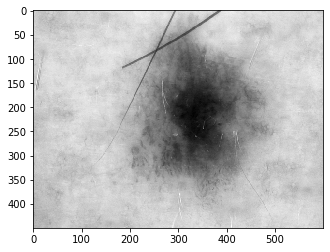

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

DATADIR = os.getcwd()
CATEGORIES = ["nv", "mel", "bkl", "bcc", "akiec", "vasc", "df"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [12]:
print(img_array.shape)

(450, 600)


### Resizing Sample Image

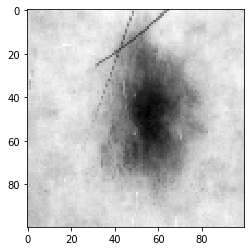

In [13]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

### Loading Training Data from Directory

In [14]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [15]:
print(len(training_data))

10015


### Shuffling the Data

In [16]:
import random

random.shuffle(training_data)

In [17]:
for sample in training_data[:10]:
    print(sample[1])

0
0
2
3
0
2
0
1
0
2


### Creating NumPy array of Features and Labels

In [18]:
X = []
y = []

In [19]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

### Saving Features and Labels as Pickle file

In [20]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()